In [1]:
#datasent link: https://www.kaggle.com/code/alditopatriza1999/sba-default-loan-classification/data

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [3]:
# files=[file for file in os.listdir('.\\finance\')]
# for file in files:
#     print(file)

In [4]:
df = pd.read_csv(r'C:\Users\25472\Desktop\finance\SBAnational.csv')
df.head()

C:\Users\25472\AppData\Local\Temp\ipykernel_13528\969270114.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\25472\Desktop\finance\SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [5]:
df.shape

(899164, 27)

# Data Preprocessing and Cleansing

In [6]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [7]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

ChgOffDate          81.905526
RevLineCr            0.503579
LowDoc               0.287156
DisbursementDate     0.263356
MIS_Status           0.222095
BankState            0.174162
Bank                 0.173383
NewExist             0.015125
City                 0.003336
Name                 0.001557
State                0.001557
dtype: float64

In [8]:
df.drop(columns = 'ChgOffDate', inplace = True)
df.shape

(899164, 26)

# Drop Unnecesary attributes

In [9]:
df.nunique()

LoanNr_ChkDgt        899164
Name                 779583
City                  32581
State                    51
Zip                   33611
Bank                   5802
BankState                56
NAICS                  1312
ApprovalDate           9859
ApprovalFY               70
Term                    412
NoEmp                   599
NewExist                  3
CreateJob               246
RetainedJob             358
FranchiseCode          2768
UrbanRural                3
RevLineCr                18
LowDoc                    8
DisbursementDate       8472
DisbursementGross    118859
BalanceGross             15
MIS_Status                2
ChgOffPrinGr          83165
GrAppv                22128
SBA_Appv              38326
dtype: int64

In [10]:
cols_to_drop = [
    'LoanNr_ChkDgt',
    'Name',
    'City',
    'State',
    'Zip',
    'Bank',
    'BankState',
    'NAICS',
    'ApprovalDate',
    'DisbursementDate',
    'RevLineCr',
    'LowDoc'
]

In [11]:
df.drop(columns = cols_to_drop, inplace = True)
df.shape

(899164, 14)

In [12]:
df['DisbursementGross'] = df['DisbursementGross'].str.replace('\W', '', regex=True)
df['BalanceGross'] = df['BalanceGross'].str.replace('\W', '', regex=True)
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].str.replace('\W', '', regex=True)
df['SBA_Appv'] = df['SBA_Appv'].str.replace('\W', '', regex=True)
df.head()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1997,84,4,2.0,0,0,1,0,6000000,000,P I F,000,"$60,000.00",4800000
1,1997,60,2,2.0,0,0,1,0,4000000,000,P I F,000,"$40,000.00",3200000
2,1997,180,7,1.0,0,0,1,0,28700000,000,P I F,000,"$287,000.00",21525000
3,1997,60,2,1.0,0,0,1,0,3500000,000,P I F,000,"$35,000.00",2800000
4,1997,240,14,1.0,7,7,1,0,22900000,000,P I F,000,"$229,000.00",22900000


In [13]:
df['GrAppv'] = df['GrAppv'].str.replace('\W', '', regex=True)
df.head()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1997,84,4,2.0,0,0,1,0,6000000,000,P I F,000,6000000,4800000
1,1997,60,2,2.0,0,0,1,0,4000000,000,P I F,000,4000000,3200000
2,1997,180,7,1.0,0,0,1,0,28700000,000,P I F,000,28700000,21525000
3,1997,60,2,1.0,0,0,1,0,3500000,000,P I F,000,3500000,2800000
4,1997,240,14,1.0,7,7,1,0,22900000,000,P I F,000,22900000,22900000


In [14]:
#convert object data types column to integer
df['DisbursementGross'] = pd.to_numeric(df['DisbursementGross'])
df['BalanceGross'] = pd.to_numeric(df['BalanceGross'])
df['ChgOffPrinGr'] = pd.to_numeric(df['ChgOffPrinGr'])
df['SBA_Appv'] = pd.to_numeric(df['SBA_Appv'])
df['GrAppv'] = pd.to_numeric(df['GrAppv'])
df.dtypes

ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
DisbursementGross      int64
BalanceGross           int64
MIS_Status            object
ChgOffPrinGr           int64
GrAppv                 int64
SBA_Appv               int64
dtype: object

# Exploratory Data Analysis

<AxesSubplot:xlabel='MIS_Status', ylabel='SBA_Appv'>

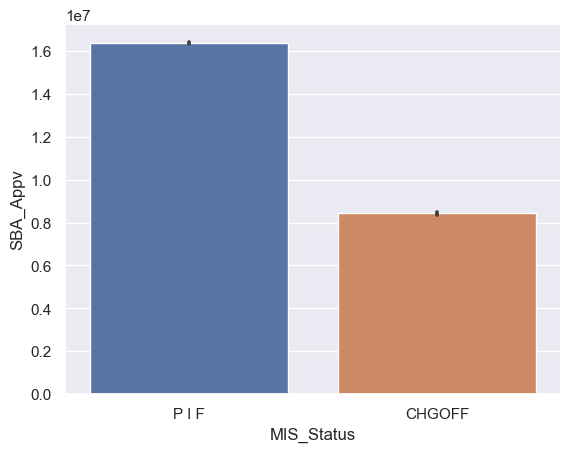

In [15]:
sns.barplot(data=df, x="MIS_Status", y="SBA_Appv")
#People with low SBA’s guaranteed amount of approved loan are most likely Loan status charged off 

<AxesSubplot:xlabel='MIS_Status', ylabel='GrAppv'>

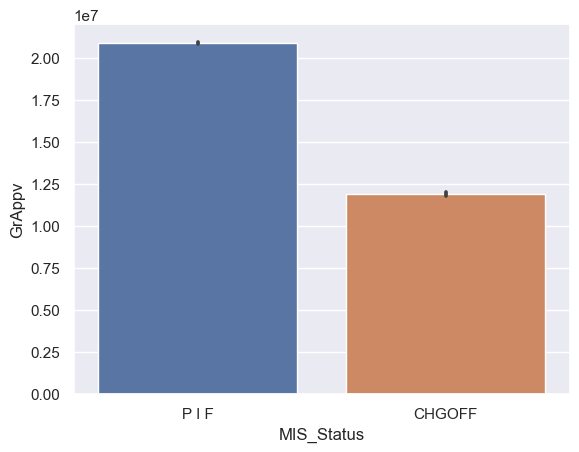

In [16]:
sns.barplot(data=df, x="MIS_Status", y="GrAppv")
#People with low Gross amount of loan approved by bank are most likely Loan status charged off 

<AxesSubplot:xlabel='MIS_Status', ylabel='ChgOffPrinGr'>

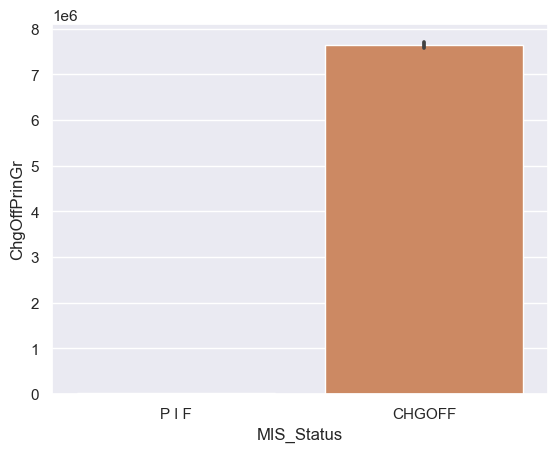

In [17]:
sns.barplot(data=df, x="MIS_Status", y="ChgOffPrinGr")
#People wih high Charged-off amount are most likely Loan status charged off

<AxesSubplot:xlabel='MIS_Status', ylabel='Term'>

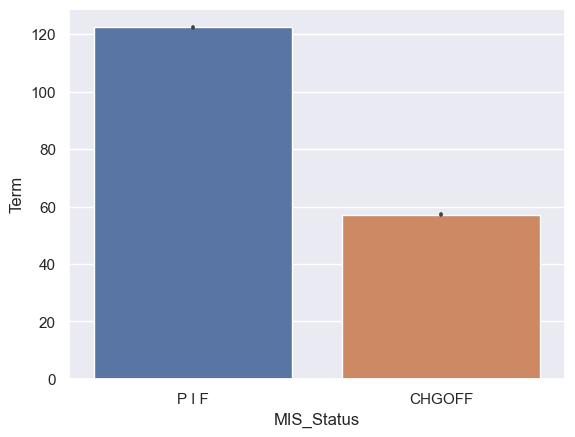

In [18]:
sns.barplot(data=df, x="MIS_Status", y="Term")
#People with high Loan term in months are most likely to Paid in full

<AxesSubplot:xlabel='MIS_Status', ylabel='BalanceGross'>

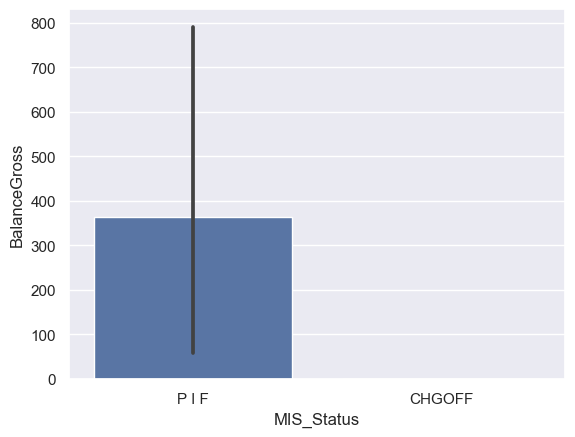

In [19]:
sns.barplot(data=df, x="MIS_Status", y="BalanceGross")
#People with hirh balance gross are most likely to Paid in full

In [20]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

C:\Users\25472\anaconda3\envs\base2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


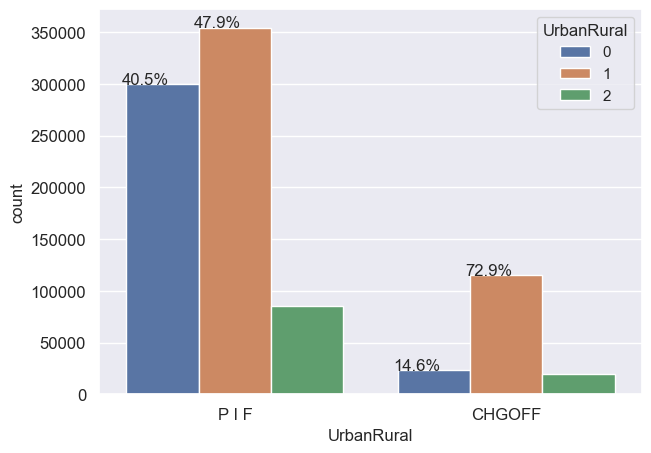

In [21]:
plt.figure(figsize=(7,5))
ax = sns.countplot('MIS_Status', hue='UrbanRural', data = df)
plt.xticks(size = 12)
plt.xlabel('MIS_Status', size = 12)
plt.yticks(size = 12)
plt.xlabel('UrbanRural', size = 12)
with_hue(ax, df.MIS_Status,2,2)
#Urban people are most likely Loan status charged off 

In [22]:
df.drop(columns = 'ApprovalFY', inplace = True)
df.shape

(899164, 13)

<AxesSubplot:xlabel='MIS_Status', ylabel='CreateJob'>

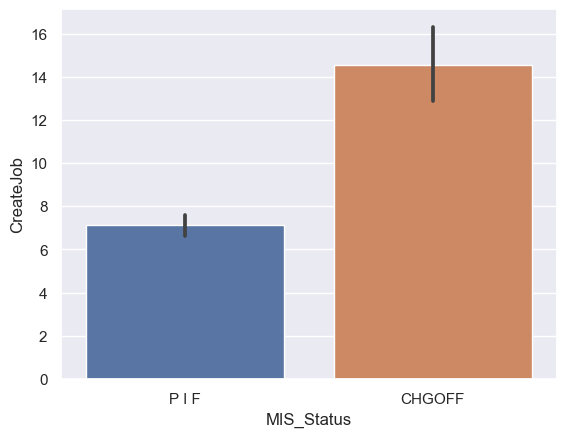

In [23]:
sns.barplot(data=df, x="MIS_Status", y="CreateJob")
#People with low amount of created job are most likely to Paid in full

<AxesSubplot:xlabel='MIS_Status', ylabel='RetainedJob'>

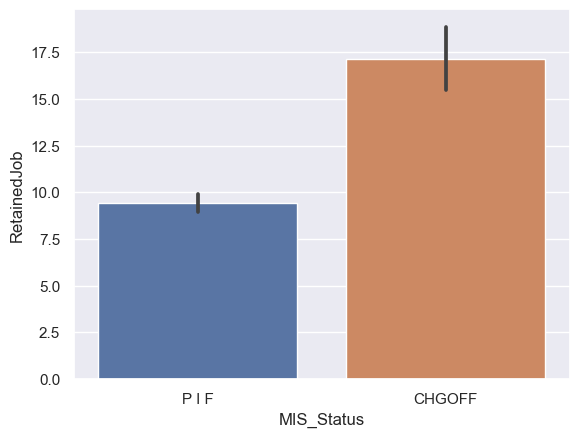

In [24]:
sns.barplot(data=df, x="MIS_Status", y="RetainedJob")
#People with low amount of retained job are most likely to Paid in full

# Data Preprocessing Part 2

In [25]:
df.head()

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,84,4,2.0,0,0,1,0,6000000,0,P I F,0,6000000,4800000
1,60,2,2.0,0,0,1,0,4000000,0,P I F,0,4000000,3200000
2,180,7,1.0,0,0,1,0,28700000,0,P I F,0,28700000,21525000
3,60,2,1.0,0,0,1,0,3500000,0,P I F,0,3500000,2800000
4,240,14,1.0,7,7,1,0,22900000,0,P I F,0,22900000,22900000


In [26]:
df.dtypes

Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
DisbursementGross      int64
BalanceGross           int64
MIS_Status            object
ChgOffPrinGr           int64
GrAppv                 int64
SBA_Appv               int64
dtype: object

In [27]:
df['MIS_Status'].unique()

array(['P I F', 'CHGOFF', nan], dtype=object)

In [28]:
df['MIS_Status'].dropna()
df.shape

(899164, 13)

In [29]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['MIS_Status']= label_encoder.fit_transform(df['MIS_Status'])
df['MIS_Status'].unique()

array([1, 0, 2])

In [30]:
df['MIS_Status'].value_counts()

1    739609
0    157558
2      1997
Name: MIS_Status, dtype: int64

In [31]:
df = df[df.MIS_Status != 2]
df.shape

(897167, 13)

In [32]:
df['MIS_Status'].unique()

array([1, 0])

In [33]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

NewExist    0.014936
dtype: float64

In [34]:
df['NewExist'].fillna(df['NewExist'].median(), inplace=True)

# Balance Class Value (MIS Status)

C:\Users\25472\anaconda3\envs\base2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    739609
0    157558
Name: MIS_Status, dtype: int64

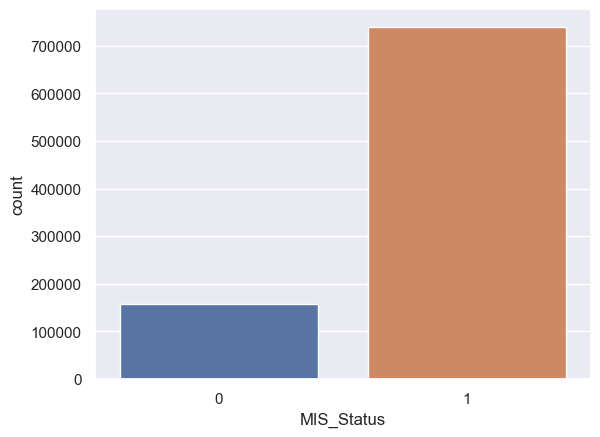

In [35]:
#Counting 1 and 0 Value in Response column
sns.countplot(df['MIS_Status'])
df['MIS_Status'].value_counts()

In [36]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['MIS_Status']==1)] 
df_minority = df[(df['MIS_Status']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 739609, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

C:\Users\25472\anaconda3\envs\base2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    739609
1    739609
Name: MIS_Status, dtype: int64

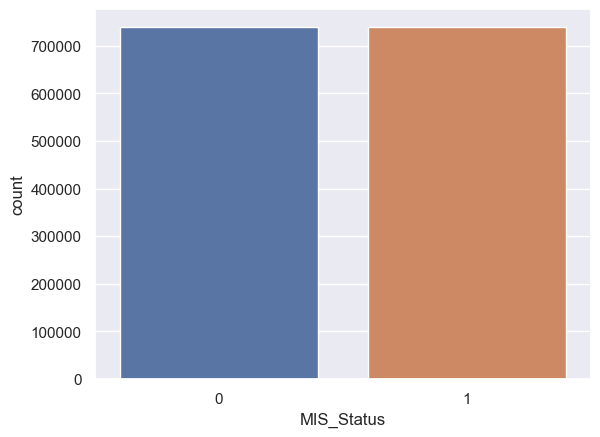

In [37]:
#Counting 1 and 0 Value in Response column
sns.countplot(df_upsampled['MIS_Status'])
df_upsampled['MIS_Status'].value_counts()

# Clean the outlier using Z-Score Method

In [38]:
#Remove Outlier using Z-Score Method
import scipy.stats as stats
z = np.abs(stats.zscore(df_upsampled))
data_clean = df_upsampled[(z<3).all(axis = 1)] 
data_clean.shape

(1367022, 13)

# Heatmap Data Correlation

<AxesSubplot:>

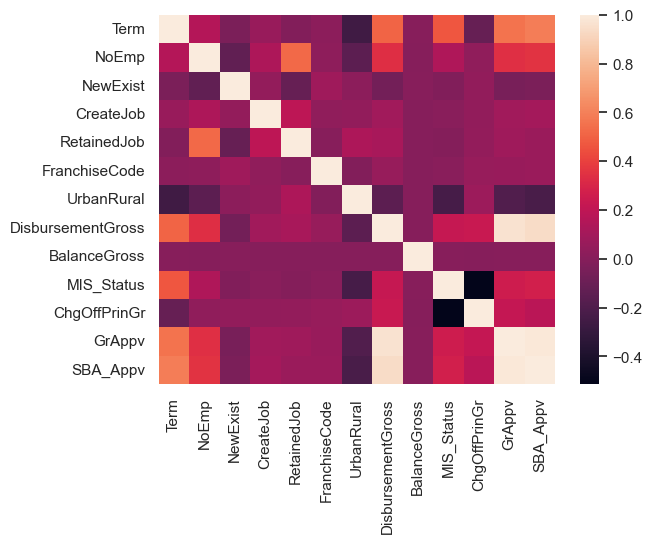

In [39]:
sns.heatmap(data_clean.corr(), fmt='.2g')

# Machine Learning Model Building

In [40]:
X = data_clean.drop('MIS_Status', axis=1)
y = data_clean['MIS_Status']

In [41]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [43]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 99.57 %


In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9956635249347315
Precision Score :  0.998971475082319
Recall Score :  0.9923774100835765


# Random Forest  Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [46]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 99.62 %


In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9961934831841956
Precision Score :  0.9997778945887719
Recall Score :  0.9926346816815271


# Visualize Best Algorithm (Random Forest Classifier)

In [51]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
9,ChgOffPrinGr,7.226684e-01
0,Term,1.873627e-01
5,FranchiseCode,2.341338e-02
6,UrbanRural,1.783382e-02
11,SBA_Appv,1.694594e-02
4,RetainedJob,1.158896e-02
10,GrAppv,7.611267e-03
7,DisbursementGross,5.860008e-03
1,NoEmp,3.708249e-03
3,CreateJob,1.710933e-03


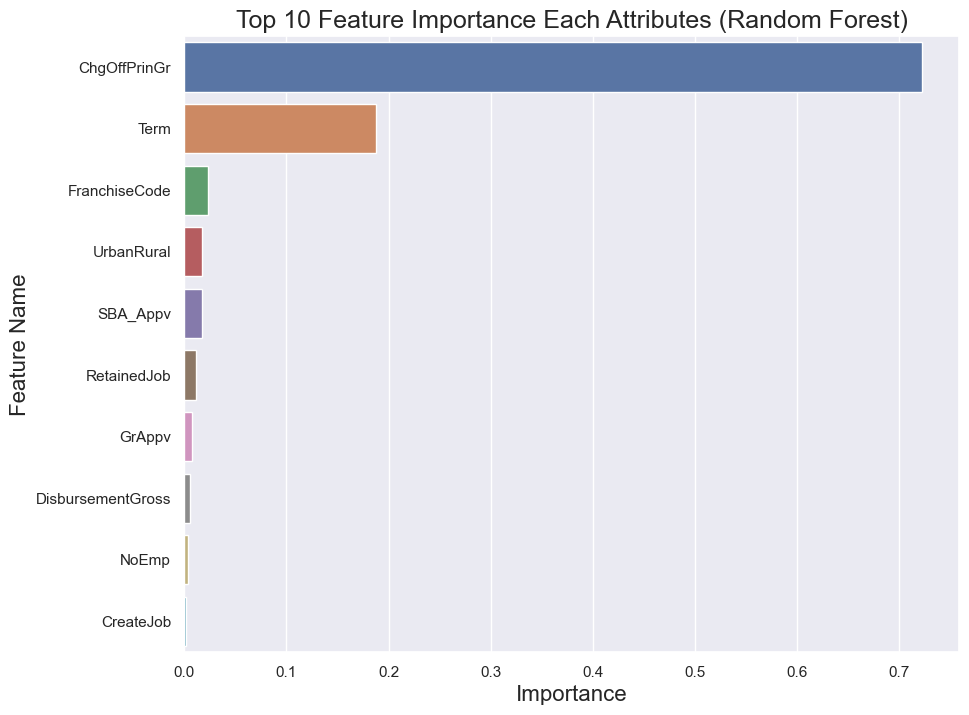

In [49]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()